In [1]:
!pip install pandas matplotlib seaborn numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

In [3]:
# Paso 1: Extracción de datos
data = pd.read_csv('nantes_nombres.csv', sep=';')

In [8]:
data.to_csv('salida.csv')

In [ ]:
# Paso 3: Análisis y visualización de datos
# Análisis básico de los datos
print("Información general de los datos:")
print(data.info())
print("\nPrimeras filas de los datos:")
print(data.head())

Información general de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6037 entries, 0 to 6036
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Commune concernée       6037 non-null   object
 1   Code INSEE              6037 non-null   int64 
 2   Sexe relatif au prénom  6037 non-null   object
 3   Prénom                  6037 non-null   object
 4   Nombre d'occurrences    6037 non-null   int64 
 5   Année                   6037 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 283.1+ KB
None

Primeras filas de los datos:
  Commune concernée  Code INSEE Sexe relatif au prénom     Prénom  \
0            Nantes       44109                      F       Inès   
1            Nantes       44109                      F      Maria   
2            Nantes       44109                      F     Thelma   
3            Nantes       44109                      F  Valentine   
4           

In [4]:
#renombrar columnas
data = data.rename(columns={'Sexe relatif au prénom':'sexe','Prénom':'prenom',"Nombre d'occurrences":'naissances', 'Année':'annee'})

In [5]:
data.head()

Commune concernée  Code INSEE sexe     prenom  naissances  annee
0            Nantes       44109    F       Inès          27   2022
1            Nantes       44109    F      Maria          17   2022
2            Nantes       44109    F     Thelma          10   2022
3            Nantes       44109    F  Valentine          10   2022
4            Nantes       44109    F       Mila           9   2022

In [ ]:
data.shape

(6037, 6)

In [ ]:
data.isnull().sum()

Commune concernée    0
Code INSEE           0
sexe                 0
prenom               0
naissances           0
annee                0
dtype: int64

In [5]:
data['naissances'].describe()

count    6037.000000
mean       16.457346
std        12.671071
min         6.000000
25%         7.000000
50%        11.000000
75%        21.000000
max       102.000000
Name: naissances, dtype: float64

In [6]:
# Filtrar nombres sin género (aparecen tanto en sexo masculino como femenino)
names_without_gender = data.groupby('prenom').filter(lambda x: x['sexe'].nunique() == 2)

# Contar ocurrencias de nombres sin género
names_count = names_without_gender.groupby('prenom')['naissances'].sum().reset_index()

# Gráfico de barras de nombres sin género
fig_names_without_gender = px.bar(names_count, x='prenom', y='naissances', color='prenom', text_auto=True, title='Prénoms sans genre des enfants nés à Nantes (2001-2022)')
fig_names_without_gender.update_layout(xaxis_title='Prenoms', yaxis_title='Naissances')
fig_names_without_gender.show()
#names_count.to_csv('names_count.csv', index=False)

In [8]:
# Calcular el porcentaje de nombres de niños por sexo y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Asignar colores a los sexos
color_map = {'M': 'blue', 'F': 'red'}
percentage_data['Color'] = percentage_data['sexe'].map(color_map)

# Crear gráfico de histograma del porcentaje de nombres de niños en Nantes
fig = go.Figure()

for sexo in ['M', 'F']:
    fig.add_trace(go.Histogram(
        x=percentage_data[percentage_data['sexe'] == sexo]['Porcentaje'],
        nbinsx=10,
        name=sexo,
        marker_color=color_map[sexo],
        opacity=0.7
    ))

fig.update_layout(
    title='Distribución del Porcentaje de Nombres de Niños en Nantes',
    xaxis_title='Porcentaje',
    yaxis_title='Frecuencia',
    barmode='overlay'
)
fig.update_traces(opacity=0.7)
fig.show()

In [10]:
# Calcular el porcentaje de nombres de pila por género y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Asignar colores por género
color_map = {'M': 'blue', 'F': 'orange'}
percentage_data['Color'] = percentage_data['sexe'].map(color_map)

# Crear gráfico de seguimiento del porcentaje de nombres de pila por género a lo largo del tiempo
fig = px.line(percentage_data, x='annee', y='Porcentaje', color='sexe', line_group='sexe',
              color_discrete_map=color_map, labels={'Porcentaje': 'Porcentaje', 'año': 'Año'})
fig.update_traces(mode='lines+markers')
fig.update_layout(title='Porcentaje de Nombres de Pila por Género en Nantes',
                  xaxis_title='Año', yaxis_title='Porcentaje')
fig.show()

In [6]:
# Calcular el porcentaje de nombres de pila por género y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Asignar colores a los géneros
color_map = {'M': 'blue', 'F': 'orange'}
percentage_data['Color'] = percentage_data['sexe'].map(color_map)

# Crear gráfico de barras apiladas del porcentaje de nombres de pila por género a lo largo del tiempo
fig = go.Figure()

for sexo in ['M', 'F']:
    fig.add_trace(go.Bar(
        x=percentage_data[percentage_data['sexe'] == sexo]['annee'],
        y=percentage_data[percentage_data['sexe'] == sexo]['Porcentaje'],
        name=sexo,
        marker_color=color_map[sexo]
    ))

fig.update_layout(
    title='Porcentaje de Nombres de Pila por Género en Nantes',
    xaxis_title='Año',
    yaxis_title='Porcentaje',
    barmode='stack'
)
fig.show()

# Exportar el gráfico a un archivo HTML
fig.write_html('porcentaje_nombres_por_genero.html')

In [25]:
# Calcular el porcentaje de nombres de pila por género y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Asignar colores a los géneros
color_map = {'M': 'blue', 'F': 'orange'}
percentage_data['Color'] = percentage_data['sexe'].map(color_map)

# Crear gráfico de barras apiladas del porcentaje de nombres de pila por género a lo largo del tiempo
fig = go.Figure()

for sexo in ['M', 'F']:
    fig.add_trace(go.Bar(
        x=percentage_data[percentage_data['sexe'] == sexo]['annee'],
        y=percentage_data[percentage_data['sexe'] == sexo]['Porcentaje'],
        name=sexo,
        marker_color=color_map[sexo]
    ))

fig.update_layout(
    title='Pourcentage de noms de piles par sexe à Nantes',
    xaxis_title='Année',
    yaxis_title='Pourcentage',
    barmode='stack'
)
fig.show()

# Exportar el gráfico a un archivo HTML
fig.write_html('Pourcentage_prenoms_sexe.html')

In [7]:
# Calcular el porcentaje de nacimientos por nombre y año
percentage_data = data.groupby(['annee', 'prenom']).agg({'naissances': 'sum'})
percentage_data = percentage_data.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percentage_data.reset_index(inplace=True)

# Filtrar los 10 nombres con más nacimientos por año
top_10_names = percentage_data.groupby('annee').apply(lambda x: x.nlargest(10, 'naissances')).reset_index(drop=True)

# Crear gráfico de porcentaje de los primeros 10 nombres más nacidos por año
fig = px.scatter(top_10_names, x='annee', y='naissances', color='prenom', hover_data=['prenom'],
                 title='Porcentaje de los Primeros 10 Nombres Más Nacidos por Año')
fig.update_layout(xaxis_title='Año', yaxis_title='Porcentaje de Nacimientos')
fig.update_traces(textposition='top center', textfont=dict(color='black'), mode='markers+text')
fig.show()

# Exportar el gráfico a un archivo HTML
fig.write_html('grafico_10_nombres_nacidos_anio.html')

<ipython-input-7-35f7ec43975d>:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [27]:
# Calcular el porcentaje de nacimientos por nombre y año
percentage_data = data.groupby(['annee', 'prenom']).agg({'naissances': 'sum'})
percentage_data = percentage_data.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percentage_data.reset_index(inplace=True)

# Filtrar los 10 nombres con más nacimientos por año
top_10_names = percentage_data.groupby('annee').apply(lambda x: x.nlargest(10, 'naissances')).reset_index(drop=True)

# Crear gráfico de porcentaje de los primeros 10 nombres más nacidos por año
fig = px.scatter(top_10_names, x='annee', y='naissances', color='prenom', hover_data=['prenom'],
                 title='Pourcentage des 10 premiers noms avec le plus grand nombre de naissances par an')
fig.update_layout(xaxis_title='Année', yaxis_title='Pourcentage des naissances')
fig.update_traces(textposition='top center', textfont=dict(color='black'), mode='markers+text')
fig.show()

# Exportar el gráfico a un archivo HTML
fig.write_html('10_prenoms_naissances_anio.html')

<ipython-input-27-5a4e3c564357>:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



Tendencias

In [9]:

from sklearn.linear_model import LinearRegression

# Filtrar los nombres que aparecen en ambos sexos
both_sex_names = data.groupby('prenom').filter(lambda x: len(x['sexe'].unique()) == 2)

# Calcular el número total de nacimientos por nombre y año
nacimientos_por_nombre_y_año = both_sex_names.groupby(['prenom', 'annee'])['naissances'].sum().reset_index()

# Paso 3: Análisis y visualización de datos

# Crear un DataFrame con las tendencias futuras
tendencias_futuras = pd.DataFrame(columns=['prenom', 'tendencia'])

# Calcular la tendencia para cada nombre
for nombre in both_sex_names['prenom'].unique():
    nombre_data = nacimientos_por_nombre_y_año[nacimientos_por_nombre_y_año['prenom'] == nombre]

    # Utilizar regresión lineal para calcular la tendencia
    X = nombre_data['annee'].values.reshape(-1, 1)
    y = nombre_data['naissances'].values
    model = LinearRegression()
    model.fit(X, y)
    tendencia = model.coef_[0]

    tendencias_futuras = tendencias_futuras.append({'prenom': nombre, 'tendencia': tendencia}, ignore_index=True)

# Ordenar los nombres por tendencia descendente
tendencias_futuras = tendencias_futuras.sort_values(by='tendencia', ascending=False)

# Visualizar la tendencia de los nombres que utilizan ambos géneros
fig = px.bar(tendencias_futuras, x='prenom', y='tendencia', labels={'tendencia': 'Tendencia'},
             title='Tendencia de Nombres que Utilizan Ambos Géneros en los Próximos Años')
fig.update_layout(xaxis_title='Nombre', yaxis_title='Tendencia')
fig.show()

# Exportar el gráfico a un archivo HTML
fig.write_html('grafico_tendencia_nombres_generos.html')

<ipython-input-9-f3fe55825749>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tendencias_futuras = tendencias_futuras.append({'prenom': nombre, 'tendencia': tendencia}, ignore_index=True)
<ipython-input-9-f3fe55825749>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tendencias_futuras = tendencias_futuras.append({'prenom': nombre, 'tendencia': tendencia}, ignore_index=True)
<ipython-input-9-f3fe55825749>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tendencias_futuras = tendencias_futuras.append({'prenom': nombre, 'tendencia': tendencia}, ignore_index=True)
<ipython-input-9-f3fe55825749>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [22]:

from sklearn.linear_model import LinearRegression

# Filtrar los nombres que aparecen en ambos sexos
both_sex_names = data.groupby('prenom').filter(lambda x: len(x['sexe'].unique()) == 2)

# Calcular el número total de nacimientos por nombre y año
nacimientos_por_nombre_y_año = both_sex_names.groupby(['prenom', 'annee'])['naissances'].sum().reset_index()

# Paso 3: Análisis y visualización de datos

# Crear un DataFrame con las tendencias futuras
tendencias_futuras = pd.DataFrame(columns=['prenom', 'tendance'])

# Calcular la tendencia para cada nombre
for nombre in both_sex_names['prenom'].unique():
    nombre_data = nacimientos_por_nombre_y_año[nacimientos_por_nombre_y_año['prenom'] == nombre]

    # Utilizar regresión lineal para calcular la tendencia
    X = nombre_data['annee'].values.reshape(-1, 1)
    y = nombre_data['naissances'].values
    model = LinearRegression()
    model.fit(X, y)
    tendencia = model.coef_[0]

    tendencias_futuras = tendencias_futuras.append({'prenom': nombre, 'tendance': tendencia}, ignore_index=True)

# Ordenar los nombres por tendencia descendente
tendencias_futuras = tendencias_futuras.sort_values(by='tendance', ascending=False)

# Visualizar la tendencia de los nombres que utilizan ambos géneros
fig = px.bar(tendencias_futuras, x='prenom', y='tendance', labels={'tendance': 'Tendance'},
             title='Tendance des noms utilisant les deux genres dans les années à venir')
fig.update_layout(xaxis_title='Prenom', yaxis_title='Tendance')
fig.show()

# Exportar el gráfico a un archivo HTML
fig.write_html('tendances_prenom.html')

<ipython-input-22-c5bb67aef741>:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-c5bb67aef741>:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-c5bb67aef741>:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-c5bb67aef741>:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-c5bb67aef741>:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-c5bb67aef741>:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [ ]:
# Contar ocurrencias de nombres sin género
names_count = names_without_gender.groupby('prenom')['naissances'].sum().reset_index()
names_count

prenom  naissances
0     Alix         331
1  Camille        1147
2  Charlie         355
3     Eden         242
4      Lou         505
5  Louison         232
6      Noa         317
7    Sasha         111
8    Swann          69

In [ ]:
# Paso 3: Análisis y visualización de datos

# Filtrar los nombres que aparecen en un solo sexo
filtered_data = data.groupby('prenom').filter(lambda x: x['sexe'].nunique() == 1)

# Calcular el porcentaje de nombres de niños por año
percentage_data = filtered_data[filtered_data['sexe'] == 'M'].groupby('annee').size() / data.groupby('annee').size() * 100

# Crear gráfico de seguimiento del porcentaje de nombres de niños a lo largo del tiempo
fig = px.line(percentage_data, x=percentage_data.index, y=percentage_data.values,
              title='Porcentaje de Nombres de Niños en Nantes (Excluyendo Nombres de Ambos Sexos)')
fig.update_layout(xaxis_title='annee', yaxis_title='Porcentaje')
fig.show()

In [ ]:
# Filtrar los nombres que aparecen en ambos sexos
both_genders_data = data.groupby('prenom').filter(lambda x: x['sexe'].nunique() == 2)

# Calcular el porcentaje de nombres de niños que aparecen en ambos sexos por año
percentage_data = both_genders_data[both_genders_data['sexe'] == 'M'].groupby('annee').size() / data.groupby('annee').size() * 100

# Crear gráfico de seguimiento del porcentaje de nombres de niños en Nantes que aparecen en ambos sexos a lo largo del tiempo
fig = px.line(percentage_data, x=percentage_data.index, y=percentage_data.values,
              title='Porcentaje de Nombres de Niños en Nantes que Aparecen en Ambos Sexos')
fig.update_layout(xaxis_title='Año', yaxis_title='Porcentaje')
fig.show()

In [ ]:
# Paso 3: Análisis y visualización de datos

# Filtrar los nombres que aparecen en un solo sexo
filtered_data = data.groupby('prenom').filter(lambda x: x['sexe'].nunique() == 1)

# Filtrar los nombres que aparecen en ambos sexos
both_genders_data = data.groupby('prenom').filter(lambda x: x['sexe'].nunique() == 2)

# Calcular el porcentaje de nombres de niños por año
percentage_data_p1 = filtered_data[filtered_data['sexe'] == 'M'].groupby('annee').size() / data.groupby('annee').size() * 100

# Calcular el porcentaje de nombres de niños que aparecen en ambos sexos por año
percentage_data_p2 = both_genders_data.groupby('annee').size() / data.groupby('annee').size() * 100

# Crear gráfico de seguimiento del porcentaje de nombres de niños a lo largo del tiempo
fig1 = px.line(percentage_data_p1, x=percentage_data_p1.index, y=percentage_data_p1.values,
              title='Porcentaje de Nombres de Niños en Nantes (Excluyendo Nombres de Ambos Sexos)')

# Crear gráfico de seguimiento del porcentaje de nombres de niños en Nantes que aparecen en ambos sexos a lo largo del tiempo
fig2 = px.line(percentage_data_p2, x=percentage_data_p2.index, y=percentage_data_p2.values,
              title='Porcentaje de Nombres de Niños en Nantes que Aparecen en Ambos Sexos')

fig2.update_layout(xaxis_title='annee', yaxis_title='Porcentaje')
fig.show()



In [ ]:
# Paso 3: Análisis y visualización de datos

# Filtrar los nombres que aparecen en un solo sexo
filtered_data = data.groupby('prenom').filter(lambda x: x['sexe'].nunique() == 1)

# Filtrar los nombres que aparecen en ambos sexos
both_genders_data = data.groupby('prenom').filter(lambda x: x['sexe'].nunique() == 2)

# Calcular el porcentaje de nombres de niños por año
percentage_data_p1 = filtered_data[filtered_data['sexe'] == 'M'].groupby('annee').size() / data.groupby('annee').size() * 100

# Calcular el porcentaje de nombres de niños que aparecen en ambos sexos por año
percentage_data_p2 = both_genders_data[both_genders_data['sexe'] == 'M'].groupby('annee').size() / data.groupby('annee').size() * 100

# Crear gráfico combinado de las dos visualizaciones
fig = px.line()
fig.add_trace(px.line(percentage_data_p2, x=percentage_data_p2.index, y=percentage_data_p2.values).data[0])
fig.add_trace(px.line(percentage_data_p1, x=percentage_data_p1.index, y=percentage_data_p1.values).data[0])

fig.update_layout(title='Comparación del Porcentaje de Nombres de Niños en Nantes',
                  xaxis_title='Año', yaxis_title='Porcentaje')
fig.show()


In [ ]:
# Calcular el porcentaje de nombres de niños por sexo y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Crear un gráfico de embudo
fig = go.Figure()

# Agregar los pasos del embudo
fig.add_trace(go.Funnel(
    name='Masculino',
    y=percentage_data[percentage_data['sexe'] == 'M']['annee'],
    x=percentage_data[percentage_data['sexe'] == 'M']['Porcentaje'],
    textinfo='value+percent initial'))

fig.add_trace(go.Funnel(
    name='Femenino',
    y=percentage_data[percentage_data['sexe'] == 'F']['annee'],
    x=percentage_data[percentage_data['sexe'] == 'F']['Porcentaje'],
    textinfo='value+percent previous'))

# Actualizar el diseño del gráfico de embudo
fig.update_layout(
    title='Porcentaje de Nombres de Niños en Nantes',
    funnelmode='stack',
    yaxis_title='annee',
    xaxis_title='Porcentaje')

# Mostrar el gráfico de embudo
fig.show()

In [ ]:
# Calcular el porcentaje de nombres de niños por sexo y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Asignar colores a los sexos
color_map = {'M': 'blue', 'F': 'red'}
percentage_data['Color'] = percentage_data['sexe'].map(color_map)

# Crear gráfico de histograma del porcentaje de nombres de niños en Nantes
fig = go.Figure()

for sexo in ['M', 'F']:
    fig.add_trace(go.Histogram(
        x=percentage_data[percentage_data['sexe'] == sexo]['Porcentaje'],
        nbinsx=10,
        name=sexo,
        marker_color=color_map[sexo],
        opacity=0.7
    ))

fig.update_layout(
    title='Distribución del Porcentaje de Nombres de Niños en Nantes',
    xaxis_title='Porcentaje',
    yaxis_title='Frecuencia',
    barmode='overlay'
)
fig.update_traces(opacity=0.7)
fig.show()

In [ ]:
# Calcular el porcentaje de nombres de niños por sexo y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Asignar colores a los sexos
color_map = {'M': 'blue', 'F': 'red'}
percentage_data['Color'] = percentage_data['sexe'].map(color_map)

# Crear gráfico de seguimiento del porcentaje de nombres de niños en Nantes a lo largo del tiempo
fig = px.line(percentage_data, x='annee', y='Porcentaje', color='sexe', line_group='sexe',
              color_discrete_map=color_map, labels={'Porcentaje': 'Porcentaje', 'año': 'Año'})
fig.update_traces(mode='lines+markers')
fig.update_layout(title='Porcentaje de Nombres de Niños en Nantes',
                  xaxis_title='Año', yaxis_title='Porcentaje')
fig.show()

In [ ]:
# Calcular el porcentaje de nombres de niños por sexo y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Crear gráfico de barras apiladas del porcentaje de nombres de niños en Nantes
fig = go.Figure()

fig.add_trace(go.Bar(x=percentage_data['annee'], y=percentage_data[percentage_data['sexe'] == 'M']['Porcentaje'],
                     name='Masculino', marker_color='blue'))
fig.add_trace(go.Bar(x=percentage_data['annee'], y=percentage_data[percentage_data['sexe'] == 'F']['Porcentaje'],
                     name='Femenino', marker_color='red'))

fig.update_layout(barmode='stack', title='Porcentaje de Nombres de Niños en Nantes',
                  xaxis_title='Año', yaxis_title='Porcentaje')

fig.show()

In [ ]:
# Calcular el porcentaje de nombres de niños por sexo y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Asignar colores a los sexos
color_map = {'M': 'blue', 'F': 'red'}
percentage_data['Color'] = percentage_data['sexe'].map(color_map)

# Crear gráfico scatter del porcentaje de nombres de niños en Nantes a lo largo del tiempo
fig = px.scatter(percentage_data, x='annee', y='Porcentaje', color='annee', symbol='sexe',
                 color_discrete_map=color_map, labels={'Porcentaje': 'Porcentaje', 'año': 'Año'})
fig.update_layout(title='Porcentaje de Nombres de Niños en Nantes',
                  xaxis_title='Año', yaxis_title='Porcentaje')
fig.show()

In [ ]:
# Calcular el porcentaje de nombres de niños por sexo y año
percentage_data = data.groupby(['annee', 'sexe']).size() / data.groupby('annee').size() * 100
percentage_data = percentage_data.reset_index(name='Porcentaje')

# Asignar colores a los sexos
color_map = {'M': 'blue', 'F': 'red'}
percentage_data['Color'] = percentage_data['sexe'].map(color_map)

# Crear gráfico de histograma del porcentaje de nombres de niños en Nantes
fig = go.Figure()

for sexo in ['M', 'F']:
    fig.add_trace(go.Histogram(
        x=percentage_data[percentage_data['sexe'] == sexo]['Porcentaje'],
        nbinsx=10,
        name=sexo,
        marker_color=color_map[sexo],
        opacity=0.7
    ))

fig.update_layout(
    title='Distribución del Porcentaje de Nombres de Niños en Nantes',
    xaxis_title='Porcentaje',
    yaxis_title='Frecuencia',
    barmode='overlay'
)
fig.update_traces(opacity=0.7)
fig.show()

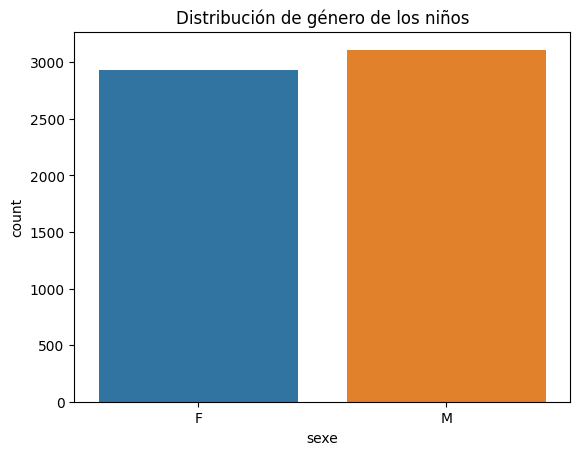

In [ ]:
# Visualización de la distribución de género
sns.countplot(x='sexe', data=data)
plt.title('Distribución de género de los niños')
plt.show()

In [ ]:
fig_gender_year = px.histogram(data, x='annee', color='sexe', text_auto=True, title='Répartition des sexes par année')
fig_gender_year.show()

In [ ]:
# Nombres de niños y niñas más utilizados por cada año
fig_popular_names_gender = px.bar(data, x='annee', y='naissances', color='prenom', facet_col='sexe',
                                  facet_col_wrap=2, title='Nombres de niños y niñas más utilizados por año')
fig_popular_names_gender.show()

In [ ]:
# Nombres utilizados en ambos sexos
common_names_both_genders = data.groupby('prenom')['sexe'].nunique()
common_names_both_genders = common_names_both_genders[common_names_both_genders == 2].index

fig_common_names_both_genders = px.bar(x=common_names_both_genders, title='Nombres utilizados en ambos sexos')
fig_common_names_both_genders.show()

In [ ]:
common_names_both_genders2 = data.groupby('prenom')['sexe'].nunique()
common_names_both_genders2 = common_names_both_genders2[common_names_both_genders2 == 2].index
common_names_both_genders2

Index(['Alix', 'Camille', 'Charlie', 'Eden', 'Lou', 'Louison', 'Noa', 'Sasha',
       'Swann'],
      dtype='object', name='prenom')

In [ ]:
# Numero de valores unicos en el dataframe
data['prenom'].nunique()

731

In [ ]:
# Numero de valores unicos en el dataframe
data['prenom'].unique()

array(['Inès', 'Maria', 'Thelma', 'Valentine', 'Mila', 'Alya', 'Eléa',
       'Léonore', 'Maëlys', 'Côme', 'Martin', 'Ethan', 'Arsène', 'Ulysse',
       'Clément', 'Alexandre', 'Enzo', 'Milo', 'Pio', 'Albin', 'Rafaël',
       'Diego', 'Hector', 'Emma', 'Alba', 'Victoire', 'Romy', 'Camille',
       'Capucine', 'Nora', 'Lila', 'Salomé', 'Héloïse', 'Aminata',
       'Joséphine', 'Madeleine', 'Aïcha', 'Ella', 'Pauline', 'Elise',
       'Ellie', 'Joy', 'Maddy', 'Mona', 'Selma', 'Alicia', 'Camélia',
       'Raphaëlle', 'Gabriel', 'Noah', 'Malo', 'Liam', 'Gaspard', 'Adam',
       'Auguste', 'Augustin', 'Pablo', 'Gustave', 'Valentin', 'Aaron',
       'Noam', 'Charlie', 'Owen', 'Roméo', 'Imran', 'Lorenzo', 'Tilio',
       'Alban', 'Alessio', 'Julian', 'Lenny', 'Luca', 'Thomas', 'Cameron',
       'Élie', 'Ezio', 'Manoé', 'Noham', 'Jade', 'Lina', 'Soline',
       'Diane', 'Lison', 'Elena', 'Louisa', 'Myriam', 'Lya', 'Lyana',
       'Amina', 'Suzie', 'Raphaël', 'Axel', 'Nathan', 'Ewen', 'Sohan',
 

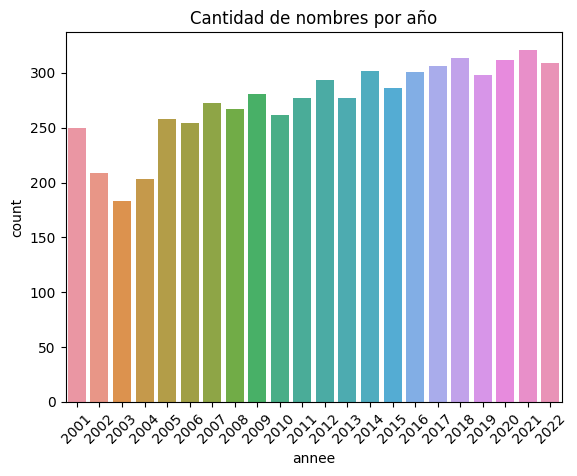

In [ ]:
# Visualización de la cantidad de nombres por año
sns.countplot(x='annee', data=data)
plt.title('Cantidad de nombres por año')
plt.xticks(rotation=45)
plt.show()

In [ ]:
px.bar(data, x='sexe', y='naissances', color='sexe', text_auto=True)

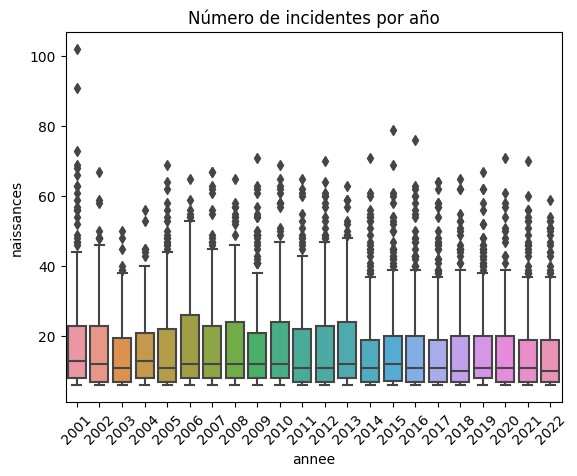

In [ ]:
# Visualización de la cantidad de incidentes por año
sns.boxplot(x='annee', y='naissances', data=data)
plt.title('Número de incidentes por año')
plt.xticks(rotation=45)
plt.show()

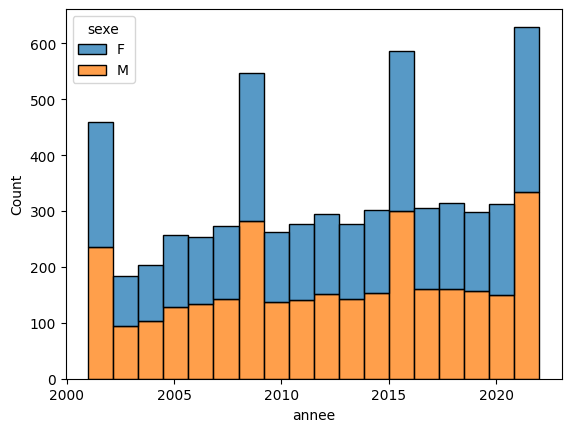

In [ ]:
sns.histplot(x='annee', hue='sexe', multiple='stack', data=data)
plt.show()

In [ ]:
data.columns

Index(['Commune concernée', 'Code INSEE', 'sexe', 'prenom', 'naissances',
       'annee'],
      dtype='object')

In [ ]:
data['prenom'].value_counts().head(10)

Camille    39
Louison    25
Charlie    25
Lou        24
Noa        24
Inès       22
Anna       22
Sarah      22
Paul       22
Simon      22
Name: prenom, dtype: int64

In [ ]:
data.sort_values('naissances', ascending=False)

Commune concernée  Code INSEE sexe   prenom  naissances  annee
4487            Nantes       44109    M   Thomas         102   2001
4474            Nantes       44109    F      Léa          91   2001
5583            Nantes       44109    M  Gabriel          79   2015
992             Nantes       44109    M  Raphaël          76   2016
4475            Nantes       44109    F    Manon          73   2001
...                ...         ...  ...      ...         ...    ...
2736            Nantes       44109    F     Eléa           6   2008
2721            Nantes       44109    M    Sasha           6   2009
2720            Nantes       44109    M     Owen           6   2009
2719            Nantes       44109    M    Jonas           6   2009
6036            Nantes       44109    M    Pablo           6   2001

[6037 rows x 6 columns]

In [ ]:
data['sexe'].value_counts()

M    3110
F    2927
Name: sexe, dtype: int64

Dataviz con Plotly

In [ ]:
#Animaciones con Plotly
px.scatter(data, x="naissances", y="naissances",
           animation_frame="annee", animation_group="prenom",
           size="naissances", color="prenom", hover_name="prenom",
           log_x=True)

In [ ]:
# Pregunta 1: Distribución de género
gender_distribution = data['sexe'].value_counts()
fig_gender = px.pie(names=gender_distribution.index, values=gender_distribution.values, title='Distribución de género de los niños')
fig_gender.show()

In [ ]:

gender_distribution = data['sexe'].value_counts()
fig_avg_incidents2 = px.bar(x=gender_distribution.index, y=gender_distribution, color=gender_distribution, title='Promedio de nacimientos por genero')
fig_avg_incidents2.show()

In [ ]:
unique_prenoms = data['prenom'].unique
unique_prenoms

<bound method Series.unique of 0            Inès
1           Maria
2          Thelma
3       Valentine
4            Mila
          ...    
6032      Emilien
6033        Edgar
6034     Jonathan
6035      Olivier
6036        Pablo
Name: prenom, Length: 6037, dtype: object>

In [ ]:
#Mostrar dos columnas
data[['prenom', 'naissances']]

prenom  naissances
0          Inès          27
1         Maria          17
2        Thelma          10
3     Valentine          10
4          Mila           9
...         ...         ...
6032    Emilien           8
6033      Edgar           6
6034   Jonathan           6
6035    Olivier           6
6036      Pablo           6

[6037 rows x 2 columns]

In [ ]:
data.index

RangeIndex(start=0, stop=6037, step=1)

In [ ]:
data.columns

Index(['Commune concernée', 'Code INSEE', 'sexe', 'prenom', 'naissances',
       'annee'],
      dtype='object')

In [ ]:
data_camille = data[data['prenom']=='Camille']
data_camille.head().value_counts

px.histogram(data_camille, 'annee')

In [ ]:
data.groupby('prenom')[['naissances']].count()

naissances
prenom               
Aaron              16
Abby                1
Abel               13
Aboubacar           1
Achille            13
...               ...
Éléonore            4
Émie                1
Émile               7
Énora               2
Éthan               1

[731 rows x 1 columns]

In [ ]:
# Pregunta 2: Nombres más comunes
common_names = data['prenom'].value_counts().sort_values(ascending=False)
fig_common_names = px.bar(x=common_names.index, y=common_names, color=common_names, text_auto=True, title='Nombres más comunes')
fig_common_names.show()

In [ ]:
# Pregunta 3: Tendencia en la elección de nombres a lo largo de los años
name_trends = data.groupby(['annee', 'prenom']).size().reset_index(name='naissances')
fig_name_trends = px.line(name_trends, x='annee', y='naissances', color='prenom', title='Tendencia de nombres a lo largo de los años')
fig_name_trends.show()

In [ ]:
# Pregunta 4: Promedio de incidentes por nombre
avg_incidents = data.groupby('prenom')['naissances'].mean().sort_values(ascending=False).head(10)
fig_avg_incidents = px.bar(x=avg_incidents.index, y=avg_incidents.values, color=avg_incidents, color_continuous_scale = 'viridis', title='Promedio de incidentes por nombre')
fig_avg_incidents.show()

In [ ]:
# Pregunta 5: Nombre más popular por año
popular_names = data.groupby('annee')['prenom'].agg(lambda x: x.value_counts().index[0])
fig_popular_names = px.bar(x=popular_names.index, y=popular_names.values,  text_auto=True, color=popular_names, color_continuous_scale = 'viridis', title='Prénom le plus populaire par an')
fig_popular_names.show()

In [ ]:
# Pregunta 6: Diferencias en la elección de nombres según el género
gender_name_counts = data.groupby(['prenom', 'sexe']).size().reset_index(name='nombre_ocurrences')
fig_gender_names = px.bar(gender_name_counts, x='prenom', y='nombre_ocurrences', color='sexe', title='Elección de nombres según el género')
fig_gender_names.show()

In [ ]:
# Pregunta 7: Correlación entre incidentes y género
fig_correlation = px.scatter(data, x='sexe', y='naissances', title='Correlación entre incidentes y género')
fig_correlation.show()

In [ ]:
# Pregunta 8: Años con mayor y menor número de nacimientos
birth_years = data['annee'].value_counts().sort_index()
fig_birth_years = px.line(x=birth_years.index, y=birth_years.values, text=birth_years, title='Número de nacimientos por año')
fig_birth_years.update_traces(textposition = "top center")
fig_birth_years.show()

In [ ]:
# Pregunta 9: Nombres únicos por año
unique_names_per_year = data.groupby('annee')['prenom'].nunique()
fig_unique_names = px.bar(x=unique_names_per_year.index, y=unique_names_per_year.values, color=unique_names_per_year, text_auto=True, title='Nombre de prénoms uniques par an')
fig_unique_names.show()

In [ ]:
# Pregunta 10: Nombres más comunes para niños y niñas
common_names_gender = data.groupby(['prenom', 'sexe']).size().reset_index(name='nombre_ocurrences')
fig_common_names_gender = px.bar(common_names_gender, y='prenom', x='nombre_ocurrences', color='sexe', title='Nombres más comunes por género')
fig_common_names_gender.show()

In [ ]:
# Contar ocurrencias de cada nombre
names_count = data.groupby('prenom')['naissances'].sum().reset_index()
names_count = names_count.sort_values(by='naissances', ascending=False).head(10)  # Obtener los 10 nombres más utilizados

# Gráfico de barras de los nombres más utilizados
fig_most_common_names = px.bar(names_count, x='prenom', y='naissances', title='Los Nombres Más Utilizados')
fig_most_common_names.update_layout(xaxis_title='Nombres', yaxis_title='Cantidad de Nacimientos')
fig_most_common_names.show()

In [ ]:
# Contar ocurrencias de cada nombre por género
names_count = data.groupby(['prenom', 'sexe']).size().reset_index(name='naissances')

# Filtrar nombres más utilizados por género
top_names_male = names_count[names_count['sexe'] == 'M'].nlargest(10, 'naissances')
top_names_female = names_count[names_count['sexe'] == 'F'].nlargest(10, 'naissances')

# Crear gráfico de barras apiladas
fig = px.bar(names_count, x='prenom', y='naissances', color='sexe', title='Nombres más utilizados por género')
fig.update_layout(xaxis_title='Nombres', yaxis_title='Cantidad', barmode='stack')

# Añadir etiquetas para los nombres más utilizados por género
for name_df, name_color in [(top_names_male, 'blue'), (top_names_female, 'pink')]:
    for i, row in name_df.iterrows():
        fig.add_annotation(
            x=row['prenom'], y=row['naissances'], text=str(row['naissances']),
            showarrow=True, font=dict(color=name_color), arrowhead=1, arrowsize=1, ax=20, ay=-30
        )

fig.show()

In [ ]:
# Agrupar por nombre y sexo y contar la cantidad de ocurrencias
names_count = data.groupby(['prenom', 'sexe'])['naissances'].sum().reset_index()

# Filtrar solo los nombres más utilizados
top_names = names_count.groupby('prenom')['naissances'].sum().nlargest(10).index

# Filtrar los datos solo para los nombres más utilizados
top_names_data = names_count[names_count['prenom'].isin(top_names)]

# Gráfico de barras diferenciado por color según el sexo
fig_top_names = px.bar(top_names_data, x='prenom', y='naissances', color='sexe', text_auto=True,
                       title='Prénoms les plus utilisés (différenciés par sexe)')
fig_top_names.update_layout(xaxis_title='Prénoms', yaxis_title='Nombre de naissances')
fig_top_names.show()

In [ ]:
# Filtrar los datos solo para los nombres más utilizados
top_names_data = names_count[names_count['prenom'].isin(top_names)]
top_names_data

prenom sexe  naissances
80    Arthur    M        1143
121  Camille    F         890
122  Camille    M         257
211     Emma    F        1102
281     Hugo    M        1024
327    Jules    M        1037
402    Louis    M        1104
404   Louise    F        1158
415    Lucas    M        1122
436      Léo    M         977
452    Manon    F         975